In [1]:
# imports
import numpy as np
import pandas as pd
from datetime import datetime
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt

In [2]:
df_energy_2021 = pd.read_csv('../../data/prepared/df_energy_2021.csv')

In [3]:
df_energy_2021.head()

,datetime,nuclear_power,not_renewable,renewable,energy_price,date,day_of_week,time,total_energy_feeding
0,2021-01-01 00:00:00,8151.120,35141.305,11491.710,48.19,2021-01-01,Friday,00:00:00,54784.135
1,2021-01-01 00:15:00,8147.209,34875.902,11331.250,48.19,2021-01-01,Friday,00:15:00,54354.361
2,2021-01-01 00:30:00,8154.020,34825.553,11179.375,48.19,2021-01-01,Friday,00:30:00,54158.948
3,2021-01-01 00:45:00,8152.820,34889.110,11072.377,48.19,2021-01-01,Friday,00:45:00,54114.307
4,2021-01-01 01:00:00,8156.530,34922.123,10955.356,44.68,2021-01-01,Friday,01:00:00,54034.009


In [4]:
df_energy_2021.describe()

,nuclear_power,not_renewable,renewable,energy_price,total_energy_feeding
count,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000
mean,7466.550683,37183.893980,25993.367037,96.849824,70643.811700
std,653.339942,10139.373676,11817.178321,73.677852,11278.411783
min,3131.990000,15496.499000,7638.333000,-69.000000,40821.269000
25%,6741.220500,29693.692250,16384.785000,53.007500,62346.310250
50%,7772.066000,36915.816000,23679.322500,75.480000,70814.240000
75%,7938.221000,44216.364750,33766.326500,112.032500,79247.691500
max,8208.705000,61927.143000,68878.686000,620.000000,100256.476000


In [5]:
df_energy_2021.loc[:,['nuclear_power', 'not_renewable', 'renewable', 'energy_price']].corr()

,nuclear_power,not_renewable,renewable,energy_price
nuclear_power,1.000000,0.399337,-0.309181,0.165172
not_renewable,0.399337,1.000000,-0.484872,0.539821
renewable,-0.309181,-0.484872,1.000000,-0.358567
energy_price,0.165172,0.539821,-0.358567,1.000000


- renewable energy has a very week negative correlation to energy price
- not renewable energy has a correlation to energy price

### Analyzation - Day of week and Energy Price

In [6]:
# Name dataframe grouped by weekeday
grp_day_of_week = df_energy_2021.groupby(['day_of_week'])

In [7]:
list_day_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Energy price grouped by day_of_week
desc = grp_day_of_week['energy_price'].describe()
# Add a column Q3 - Q1
desc['QD'] = (desc['75%'] - desc['25%']) / 2
# create a series of median and rename column
median = grp_day_of_week['energy_price'].median()
median.rename('median', inplace=True)

# merge extended description and median 
desc_with_med_and_qd = pd.merge(desc, median, on='day_of_week')
desc_with_med_and_qd.reindex(index=list_day_of_week)

,count,mean,std,min,25%,50%,75%,max,QD,median
day_of_week,,,,,,,,,,
Monday,4992.0,106.620248,80.460108,-52.73,56.3250,79.930,130.0675,465.98,36.87125,79.930
Tuesday,4992.0,108.411947,81.493559,0.10,58.4150,81.410,126.5225,620.00,34.05375,81.410
Wednesday,4992.0,106.205417,79.017923,-36.71,56.0800,80.235,121.6450,529.20,32.78250,80.235
Thursday,4992.0,106.213998,79.785320,-8.86,57.1800,81.010,118.9700,450.06,30.89500,81.010
Friday,5088.0,95.204631,64.207624,-20.95,55.5750,78.295,110.0000,403.92,27.21250,78.295
Saturday,4992.0,84.270553,61.686384,-69.00,49.4075,66.070,102.0300,335.28,26.31125,66.070
Sunday,4992.0,71.053614,56.099818,-66.18,40.4000,58.075,88.0475,328.00,23.82375,58.075


- Energy price on weekend are lower than on weekdays
- Mean and median are almost the same -> the prices are more or less evenly distributed from the lowest to highest price

<AxesSubplot: xlabel='day_of_week', ylabel='energy_price'>

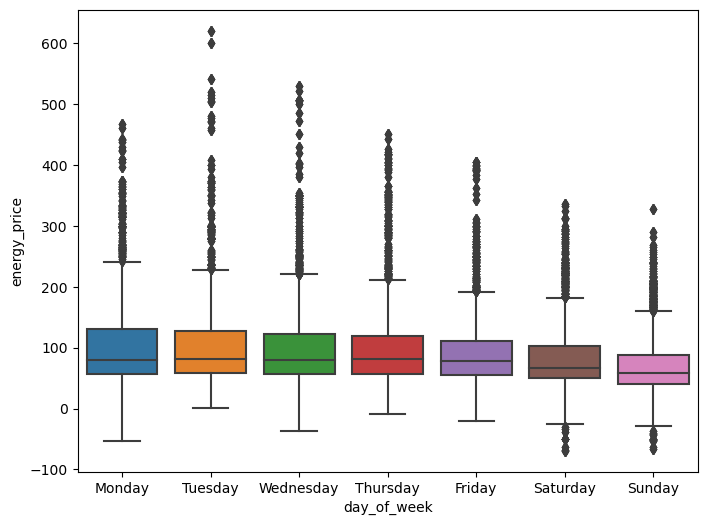

In [8]:
plt.figure(figsize=(8, 6))
sns.boxplot(
    x=df_energy_2021['day_of_week'], 
    order=list_day_of_week, 
    y=df_energy_2021['energy_price'] 
    )

- For all days of week, we have quite some outliers.
- Monday has the widest range of price

### Analyzation -  Energy feeding volume and day of week

In [9]:
# reshape df_energy_2021
df_energy_2021_reshape = df_energy_2021.melt(['datetime', 'day_of_week', 'energy_price', 'date', 'time'], var_name='type_of_power', value_name='feeding_volume')

df_energy_2021_reshape.head()

,datetime,day_of_week,energy_price,date,time,type_of_power,feeding_volume
0,2021-01-01 00:00:00,Friday,48.19,2021-01-01,00:00:00,nuclear_power,8151.120
1,2021-01-01 00:15:00,Friday,48.19,2021-01-01,00:15:00,nuclear_power,8147.209
2,2021-01-01 00:30:00,Friday,48.19,2021-01-01,00:30:00,nuclear_power,8154.020
3,2021-01-01 00:45:00,Friday,48.19,2021-01-01,00:45:00,nuclear_power,8152.820
4,2021-01-01 01:00:00,Friday,44.68,2021-01-01,01:00:00,nuclear_power,8156.530


<AxesSubplot: xlabel='type_of_power', ylabel='feeding_volume'>

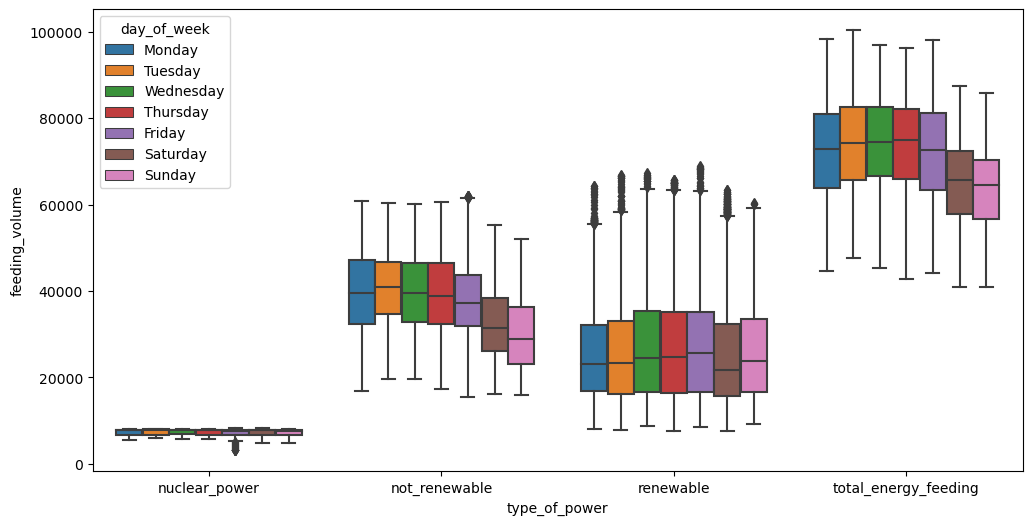

In [10]:
plt.figure(figsize=(12, 6))
sns.boxplot(
    data=df_energy_2021_reshape,
    x='type_of_power',
    y='feeding_volume',
    hue='day_of_week',
    hue_order=list_day_of_week
)

- No significant differences on feeding volume of nuclear power and renewable energy per day of week
- Feeding volume of not renewable energy is considerably less (by about 10.000 MW)
--> Total feeding volume of renewable energy is the same also on weekends, but the demand is less (refer to the article above), so that the feeding volume of not renewable energy becomes lower, which leads to the lower price.

Ref:
[Bruttostromerzeugung in Deutschland 2019-2022](https://www.destatis.de/DE/Themen/Branchen-Unternehmen/Energie/Erzeugung/Tabellen/bruttostromerzeugung.html)

## Percentage energy feeding volume per power category

In [11]:
df_energy_2021['nuclear_power%'] = df_energy_2021['nuclear_power'] / df_energy_2021['total_energy_feeding']
df_energy_2021['not_renewable%'] = df_energy_2021['not_renewable'] / df_energy_2021['total_energy_feeding']
df_energy_2021['renewable%'] = df_energy_2021['renewable'] / df_energy_2021['total_energy_feeding']

In [12]:
grp_day_of_week = df_energy_2021.groupby('day_of_week')
volume_ratio_per_power = grp_day_of_week.agg({
    'nuclear_power%': np.mean, 
    'not_renewable%': np.mean, 
    'renewable%': np.mean, 
})

volume_ratio_per_power.reindex(index=list_day_of_week)

,nuclear_power%,not_renewable%,renewable%
day_of_week,,,
Monday,0.106467,0.550404,0.343130
Tuesday,0.104424,0.559753,0.335823
Wednesday,0.103633,0.545302,0.351065
Thursday,0.103733,0.540864,0.355403
Friday,0.106100,0.527917,0.365982
Saturday,0.116640,0.507079,0.376280
Sunday,0.118057,0.479585,0.402358


In [13]:
volume_per_power = grp_day_of_week.agg({
    'nuclear_power': np.mean, 
    'not_renewable': np.mean, 
    'renewable': np.mean, 
})
volume_per_power.reindex(index=list_day_of_week)


,nuclear_power,not_renewable,renewable
day_of_week,,,
Monday,7487.165483,39511.243950,25061.229431
Tuesday,7534.875346,40919.958866,25345.170439
Wednesday,7514.194251,39920.160579,26680.923162
Thursday,7482.920036,39465.122360,26795.948396
Friday,7463.254942,37608.245971,27021.894215
Saturday,7436.612691,32665.737890,25030.386054
Sunday,7346.895410,30188.627629,25998.238195
